## Loading & preparation

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import requests
import json
import plotly.express as px
import plotly.io as pio
from geopy import distance
pio.templates[pio.templates.default].layout.colorway = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.options.mode.chained_assignment = None
import plotly.io as pio
pio.renderers.default = "svg"

## Pre-Processing

### Combining the datasets
Combining all the datasets and combining into one dataset.

In [2]:
for i in range(1, 10):
    if i < 10:
        df_new = pd.read_csv("C:\\Users\\npnis\\OneDrive\\Desktop\\Nisarg\\Toronto Bike Share Data\\toronto_bike_share\\bikeshare-ridership-2022\\bikeshare-ridership-2022\\Bike share ridership 2022-0"+ str(i) +".csv")
    if i == 1:
        df = df_new
    else:
        df = pd.concat([df, df_new])
df

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,14805109,4335,7334,01/01/2022 00:02,Simcoe St / Wellington St North,7269.0000,01/01/2022 01:15,Toronto Eaton Centre (Yonge St),5139,Casual Member
1,14805110,126,7443,01/01/2022 00:02,Dundas St E / George St,7270.0000,01/01/2022 00:05,Church St / Dundas St E - SMART,3992,Annual Member
2,14805112,942,7399,01/01/2022 00:04,Lower Jarvis / Queens Quay E,7686.0000,01/01/2022 00:19,NaN,361,Annual Member
3,14805113,4256,7334,01/01/2022 00:04,Simcoe St / Wellington St North,7269.0000,01/01/2022 01:15,Toronto Eaton Centre (Yonge St),4350,Casual Member
4,14805114,4353,7334,01/01/2022 00:05,Simcoe St / Wellington St North,7038.0000,01/01/2022 01:17,Dundas St W / Yonge St,5074,Casual Member
...,...,...,...,...,...,...,...,...,...,...
602812,18998012,250,7654,09/30/2022 23:59,Bloor St W / Pacific Ave,7466.0000,10/01/2022 00:03,Glendonwynne Ave / Bloor St W,6443,Casual Member
602813,18998013,2088,7199,09/30/2022 23:59,College St / Markham St,7581.0000,10/01/2022 00:34,High Park Ave / Dundas St W,2258,Annual Member
602814,18998014,757,7548,09/30/2022 23:59,St Joseph St / Bay St - SMART,7458.0000,10/01/2022 00:12,Church St / Lombard St,4978,Casual Member
602815,18998015,1295,7016,09/30/2022 23:59,Bay St / Queens Quay W (Ferry Terminal),7079.0000,10/01/2022 00:21,McGill St / Church St,6407,Annual Member


According to the above table we can infer that:

- Trip Id: Object ID, unique integer
- Trip Duration: Duration of a trip in seconds
- Start Station Id: ID of the station where the trip started (origin)
- Start time: mm/dd/yyyy 00:00
- Start Station Name
- End Station Id: ID of the station where the trip ended (destination)
- End Time
- End Station Name
- Bike Id
- User type: The type of user that took the trip, member (annual pass holder) or casual (24 or 72 hour pass holders)

In [3]:
#just to check some statistics about each feature
df.describe()

,Trip Id,Trip Duration,Start Station Id,End Station Id,Bike Id
count,3620479.0000,3620479.0000,3620479.0000,3619634.0000,3620479.0000
mean,16929998.0436,998.2766,7273.7693,7271.0544,3813.0339
std,1205027.8067,4725.5033,198.5370,198.2152,2032.8089
min,14805109.0000,0.0000,7000.0000,7000.0000,15.0000
25%,15889950.5000,447.0000,7098.0000,7094.0000,2139.0000
50%,16942760.0000,742.0000,7250.0000,7246.0000,3979.0000
75%,17975366.5000,1176.0000,7419.0000,7418.0000,5599.0000
max,18998017.0000,2285739.0000,7725.0000,7725.0000,7263.0000


In [4]:
#to check if there are any null values in any of the feature
df.isna().sum()

Trip Id                    0
Trip  Duration             0
Start Station Id           0
Start Time                 0
Start Station Name    124776
End Station Id           845
End Time                   0
End Station Name      126692
Bike Id                    0
User Type                  0
dtype: int64

### Dropping Irrelevant Values

From the above summary we can say that there are some missing values in End Station ID, thus we will drop that values where end station id is null as we don't want that percentage of data to analyze further.

In [5]:
df_v1 = df[df["End Station Id"].notnull()]
df_v1.isna().sum()

Trip Id                    0
Trip  Duration             0
Start Station Id           0
Start Time                 0
Start Station Name    124755
End Station Id             0
End Time                   0
End Station Name      125847
Bike Id                    0
User Type                  0
dtype: int64

While we printed out the describe step, we saw that the min value of Trip Duration is 0 which we do not require as it might have some error while docking back the cycle at end station. So we will also drop that particular rows.

In [6]:
df_v2 = df_v1[df_v1["Trip  Duration"] != 0]
df_v2.describe()

,Trip Id,Trip Duration,Start Station Id,End Station Id,Bike Id
count,3616970.0000,3616970.0000,3616970.0000,3616970.0000,3616970.0000
mean,16929919.0311,998.5111,7273.7619,7271.0429,3813.2447
std,1204971.8741,4669.3742,198.5358,198.2070,2032.7773
min,14805109.0000,2.0000,7000.0000,7000.0000,15.0000
25%,15889834.2500,447.0000,7098.0000,7094.0000,2139.0000
50%,16942665.5000,742.0000,7250.0000,7246.0000,3981.0000
75%,17975223.7500,1177.0000,7419.0000,7418.0000,5600.0000
max,18998017.0000,2285739.0000,7725.0000,7725.0000,7263.0000


- From the above summary, we can see that the minimum value of trip duration is 2 which means we nullifed that 0 seconds trip duration.
- The start time and end time can be converted to date time to process it easily and for plotting purpose.

In [7]:
df_v2['Start Time'] = pd.to_datetime(df_v2['Start Time'])
df_v2['End Time'] = pd.to_datetime(df_v2['End Time'])

In [8]:
df_v2.describe()

,Trip Id,Trip Duration,Start Station Id,End Station Id,Bike Id
count,3616970.0000,3616970.0000,3616970.0000,3616970.0000,3616970.0000
mean,16929919.0311,998.5111,7273.7619,7271.0429,3813.2447
std,1204971.8741,4669.3742,198.5358,198.2070,2032.7773
min,14805109.0000,2.0000,7000.0000,7000.0000,15.0000
25%,15889834.2500,447.0000,7098.0000,7094.0000,2139.0000
50%,16942665.5000,742.0000,7250.0000,7246.0000,3981.0000
75%,17975223.7500,1177.0000,7419.0000,7418.0000,5600.0000
max,18998017.0000,2285739.0000,7725.0000,7725.0000,7263.0000


#### Facts after data cleaning:
- 3,616,970 trips in total
- Average trip duration: 998.51 seconds (16.64 minutes)

All the IDs should be string so that we can concactinate it in future steps

In [9]:
df_v2['Trip Id'] = df_v2['Trip Id'].astype("string")
df_v2['Start Station Id'] = df_v2['Start Station Id'].astype("string")
df_v2['End Station Id'] = df_v2['End Station Id'].astype("int")
df_v2['End Station Id'] = df_v2['End Station Id'].astype("string")
df_v2['Bike Id'] = df_v2['Bike Id'].astype("int")
df_v2['Bike Id'] = df_v2['Bike Id'].astype("string")

## Data Analysis 1:

In [10]:
import plotly
plotly.__version__

'5.3.1'

##### How many trips did poeple in Toronto had with Bike Share Toronto in 2022?


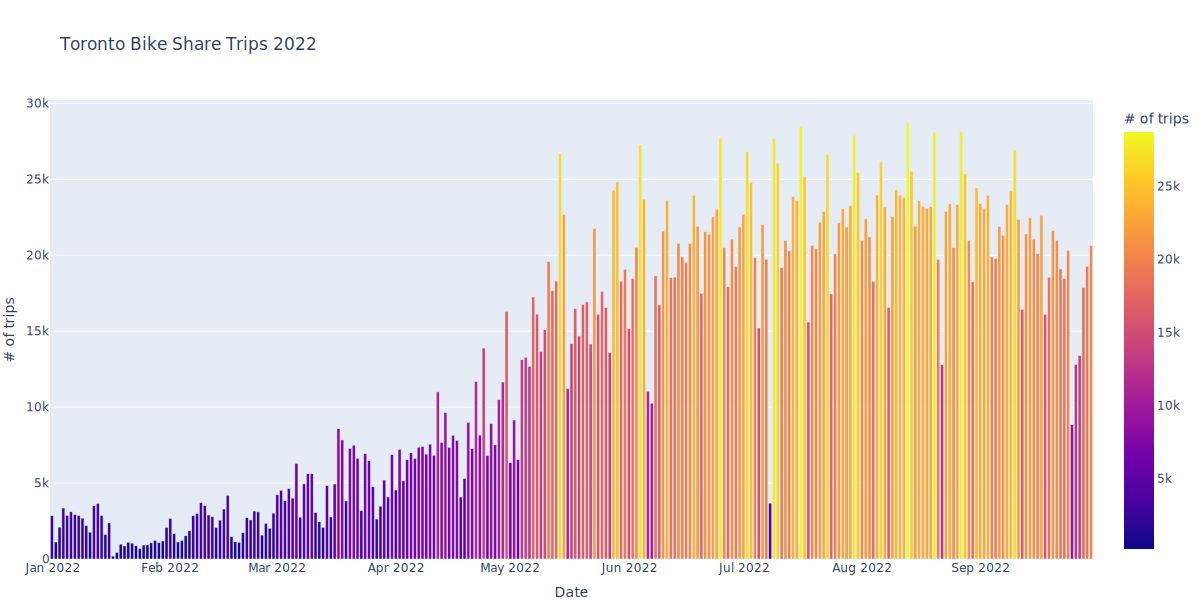

In [15]:
byDate = df_v2.groupby([df_v2['Start Time'].dt.date])["Start Station Id"].count()
byDate = byDate.reset_index()
fig = px.bar(byDate, x='Start Time', y='Start Station Id',
             color='Start Station Id',
             labels={'Start Time':'Date', 'Start Station Id':'# of trips'}, 
             title='Toronto Bike Share Trips 2022', width=1200, height=600)

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show(renderer = 'svg')

##### How many trips did poeple in Toronto had with Bike Share Toronto in 2022 but seggregated by Casual and Annual Members?

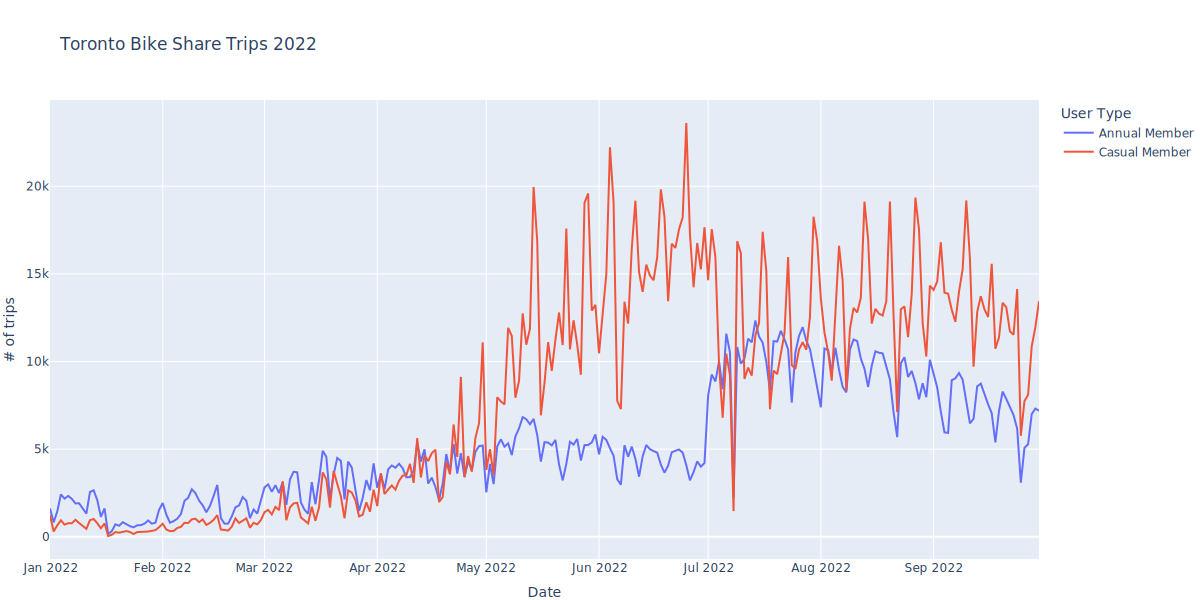

In [16]:
byDate_line = df_v2.groupby([df_v2['Start Time'].dt.date, 'User Type'])["Start Station Id"].count()
byDate_line = byDate_line.reset_index()
fig = px.line(byDate_line, x='Start Time', y='Start Station Id', 
              labels={'Start Time':'Date', 'Start Station Id':'# of trips'}, color='User Type',
              title='Toronto Bike Share Trips 2022', width=1200, height=600)

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show(renderer = 'svg')

##### How many trips did poeple in Toronto had with Bike Share Toronto in 2022 seggregated on a monthly basis?

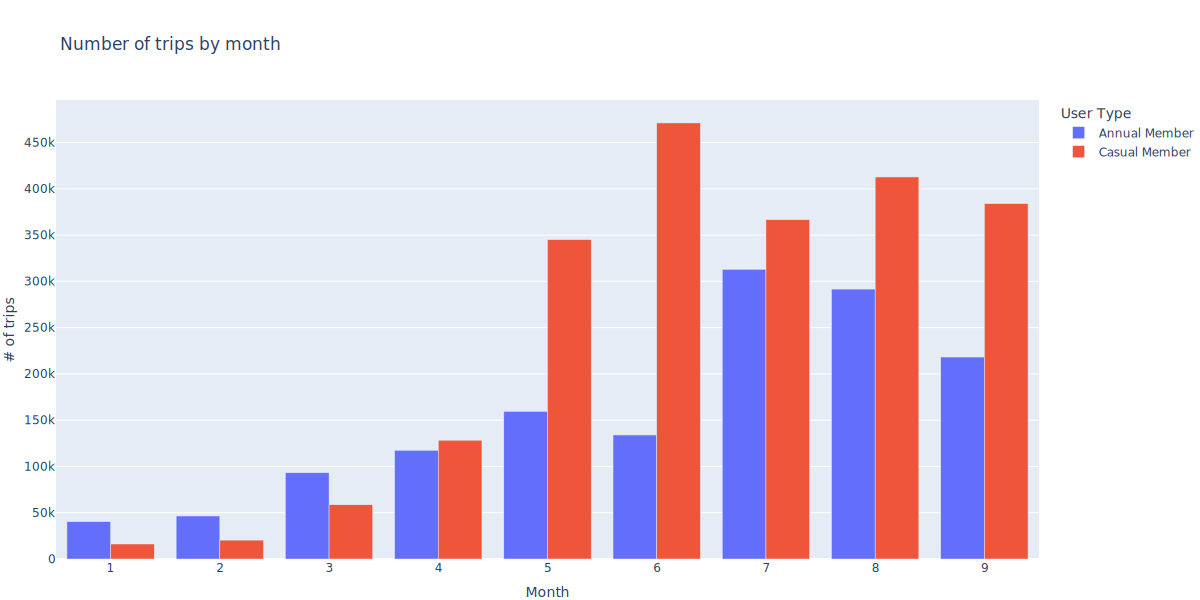

In [18]:
byMonth = df_v2.groupby([df_v2['Start Time'].dt.month, 'User Type'])["Start Station Id"].count()
byMonth = byMonth.reset_index()
fig = px.bar(byMonth, x='Start Time', y='Start Station Id',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Month', 'Start Station Id':'# of trips'}, 
             title='Number of trips by month', width=1200, height=600)
fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

##### How many trips did poeple in Toronto had with Bike Share Toronto in 2022 seggregated on a daily basis?

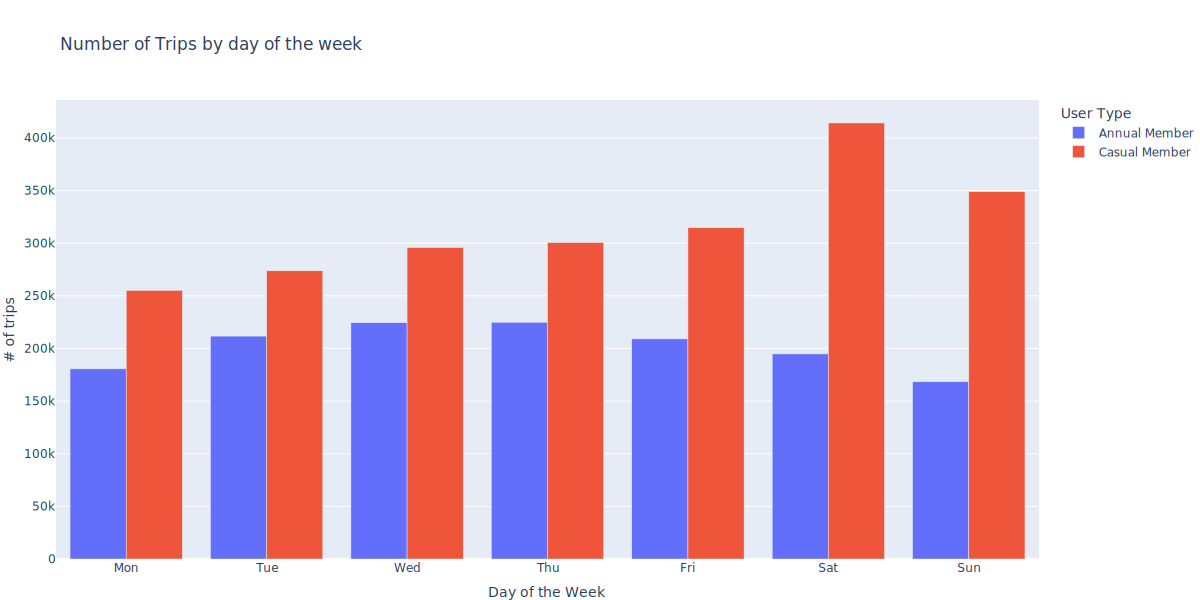

In [40]:
byWeek = df_v2.groupby([df_v2['Start Time'].dt.weekday, 'User Type'])["Start Station Id"].count()
byWeek = byWeek.reset_index()
byWeek["Start Time"] = byWeek["Start Time"].astype("string")
byWeek = byWeek.replace({'Start Time': {"0": "Mon", "1": "Tue", "2": "Wed", "3": "Thu", 
                                        "4": "Fri", "5": "Sat", "6": "Sun"}})
fig = px.bar(byWeek, x='Start Time', y='Start Station Id',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Day of the Week', 'Start Station Id':'# of trips'}, 
             title='Number of Trips by day of the week', width=1200, height=600)
fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

##### How many trips did poeple in Toronto had with Bike Share Toronto in 2022 seggregated on a hourly basis?

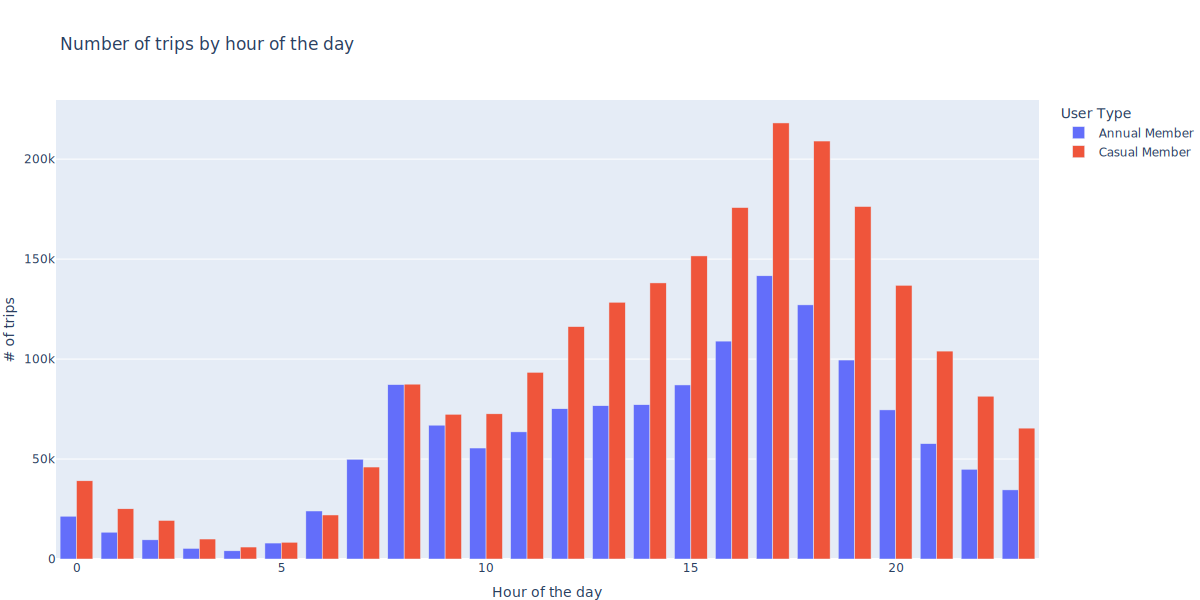

In [22]:
byHr = df_v2.groupby([df_v2['Start Time'].dt.hour, 'User Type'])["Start Station Id"].count()
byHr = byHr.reset_index()
fig = px.bar(byHr, x='Start Time', y='Start Station Id',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Hour of the day', 'Start Station Id':'# of trips'}, title='Number of trips by hour of the day', width=1200, height=600)

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

## Data Analysis 2:

### Pre-processing to analyze data

#### Calculate distance and average speed for each trip to plot

- To plot various charts based on the distance we need the data of the location of the stations which are available online.
- Thus, importing that data from the open sourse platform.

In [23]:
r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'string',
})
bikeshare_stations

,station_id,name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.6398,-79.3960
1,7001,Wellesley Station Green P,43.6650,-79.3836
2,7002,St. George St / Bloor St W,43.6673,-79.3994
3,7003,Madison Ave / Bloor St W,43.6672,-79.4028
4,7004,University Ave / Elm St,43.6565,-79.3891
...,...,...,...,...
649,7756,Tobemory Dr / Finch Hydro Recreational Trail,43.7612,-79.5114
650,7757,The Well,43.6429,-79.3946
651,7758,Driftwood Ave / Finch Hydro Trail,43.7604,-79.5163
652,7759,The Pond Rd / Shoreham Dr,43.7724,-79.5119


- To know the unique routes we need to combine the start station ID and end station ID and calculate the unique routes.

In [24]:
df_v2["routes"] = df_v2["Start Station Id"].str.cat("-" + df_v2["End Station Id"])
routes = df_v2[['Start Station Id', 'End Station Id', "routes"]].drop_duplicates()
routes

,Start Station Id,End Station Id,routes
0,7334,7269,7334-7269
1,7443,7270,7443-7270
2,7399,7686,7399-7686
4,7334,7038,7334-7038
5,7524,7136,7524-7136
...,...,...,...
602474,7660,7289,7660-7289
602483,7639,7291,7639-7291
602498,7244,7138,7244-7138
602705,7322,7388,7322-7388


In [25]:
#merging the routes df to the main df to insert the information from the main df
routes = routes.merge(bikeshare_stations, how='inner', left_on='Start Station Id', right_on='station_id') \
        .merge(bikeshare_stations, how='inner', left_on='End Station Id', right_on='station_id', suffixes=['_start', '_end']).drop_duplicates()
routes

,Start Station Id,End Station Id,routes,station_id_start,name_start,lat_start,lon_start,station_id_end,name_end,lat_end,lon_end
0,7334,7269,7334-7269,7334,Simcoe St / Wellington St North,43.6462,-79.3855,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807
1,7443,7269,7443-7269,7443,Dundas St E / George St,43.6575,-79.3734,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807
2,7399,7269,7399-7269,7399,Lower Jarvis / Queens Quay E,43.6442,-79.3693,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807
3,7524,7269,7524-7269,7524,Lisgar Park,43.6424,-79.4240,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807
4,7569,7269,7569-7269,7569,Toronto Inukshuk Park,43.6324,-79.4098,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807
...,...,...,...,...,...,...,...,...,...,...,...
194284,7624,7616,7624-7616,7624,Guildwood GO Station (South),43.7550,-79.1971,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319
194285,7626,7616,7626-7616,7626,Rouge Hill GO Station,43.7806,-79.1301,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319
194286,7616,7616,7616-7616,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319
194287,7613,7616,7613-7616,7613,Livingston Rd (Highland Creek Trail),43.7562,-79.2027,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319


- Calculate distance using geopy library and also add a column which have the frequency of the trip routes.
- Merging the count to the main routes dataset

In [26]:
routes['distance'] = routes.apply(lambda x: distance.distance((x['lat_start'], x['lon_start']), (x['lat_end'], x['lon_end'])).m, axis=1)
routes_count = df_v2.groupby("routes")['Trip Id'].count()
routes_count = routes_count.reset_index()
routes_count = routes_count.rename({'Trip Id': 'Count'}, axis='columns')
routes = routes.merge(routes_count[['routes', 'Count']], how='left', on='routes')
routes

,Start Station Id,End Station Id,routes,station_id_start,name_start,lat_start,lon_start,station_id_end,name_end,lat_end,lon_end,distance,Count
0,7334,7269,7334-7269,7334,Simcoe St / Wellington St North,43.6462,-79.3855,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807,1095.9408,17
1,7443,7269,7443-7269,7443,Dundas St E / George St,43.6575,-79.3734,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807,624.2173,15
2,7399,7269,7399-7269,7399,Lower Jarvis / Queens Quay E,43.6442,-79.3693,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807,1547.5380,82
3,7524,7269,7524-7269,7524,Lisgar Park,43.6424,-79.4240,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807,3787.7000,18
4,7569,7269,7569-7269,7569,Toronto Inukshuk Park,43.6324,-79.4098,7269,Toronto Eaton Centre (Yonge St),43.6554,-79.3807,3474.4428,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194284,7624,7616,7624-7616,7624,Guildwood GO Station (South),43.7550,-79.1971,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319,5841.9321,1
194285,7626,7616,7626-7616,7626,Rouge Hill GO Station,43.7806,-79.1301,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319,316.4554,129
194286,7616,7616,7616-7616,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319,0.0000,992
194287,7613,7616,7613-7616,7613,Livingston Rd (Highland Creek Trail),43.7562,-79.2027,7616,Waterfront Trail (Rouge Hill),43.7780,-79.1319,6192.9486,2


- Merge the distance calculation with the main DataFrame.
- Calculate the average speed of the rider.

In [27]:
df_v3 = df_v2.merge(routes[['routes', 'distance']], how='left', on='routes')
df_v3["avg_speed"] = df_v3["distance"]/ (df_v3["Trip  Duration"])
df_v3

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,routes,distance,avg_speed
0,14805109,4335,7334,2022-01-01 00:02:00,Simcoe St / Wellington St North,7269,2022-01-01 01:15:00,Toronto Eaton Centre (Yonge St),5139,Casual Member,7334-7269,1095.9408,0.2528
1,14805110,126,7443,2022-01-01 00:02:00,Dundas St E / George St,7270,2022-01-01 00:05:00,Church St / Dundas St E - SMART,3992,Annual Member,7443-7270,311.5056,2.4723
2,14805112,942,7399,2022-01-01 00:04:00,Lower Jarvis / Queens Quay E,7686,2022-01-01 00:19:00,NaN,361,Annual Member,7399-7686,411.6348,0.4370
3,14805113,4256,7334,2022-01-01 00:04:00,Simcoe St / Wellington St North,7269,2022-01-01 01:15:00,Toronto Eaton Centre (Yonge St),4350,Casual Member,7334-7269,1095.9408,0.2575
4,14805114,4353,7334,2022-01-01 00:05:00,Simcoe St / Wellington St North,7038,2022-01-01 01:17:00,Dundas St W / Yonge St,5074,Casual Member,7334-7038,1144.2618,0.2629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616965,18998012,250,7654,2022-09-30 23:59:00,Bloor St W / Pacific Ave,7466,2022-10-01 00:03:00,Glendonwynne Ave / Bloor St W,6443,Casual Member,7654-7466,890.4095,3.5616
3616966,18998013,2088,7199,2022-09-30 23:59:00,College St / Markham St,7581,2022-10-01 00:34:00,High Park Ave / Dundas St W,2258,Annual Member,7199-7581,5015.1903,2.4019
3616967,18998014,757,7548,2022-09-30 23:59:00,St Joseph St / Bay St - SMART,7458,2022-10-01 00:12:00,Church St / Lombard St,4978,Casual Member,7548-7458,1867.2874,2.4667
3616968,18998015,1295,7016,2022-09-30 23:59:00,Bay St / Queens Quay W (Ferry Terminal),7079,2022-10-01 00:21:00,McGill St / Church St,6407,Annual Member,7016-7079,2198.1761,1.6974


#### Some special cases

From data cleaning and calculation of routes and speed, we find some special cases:

- **Same start and end station** : This can be seen where distance = 0 and which might mean that the start and stop location of the bike could be same.

- **Long distance within short time**: Usually the cycling speed is around 10 m/s, and 50 m/s would be considered phenomenal.

Thus, from the above the above cases we would only select with distance != 0 and speed <=30 m/s so that we consider some useful cases only.

In [28]:
df_v3 = df_v3[(df_v3["Trip  Duration"] != 0)]
df_v4 = df_v3[(df_v3["avg_speed"] < 30)]
df_v4

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,routes,distance,avg_speed
0,14805109,4335,7334,2022-01-01 00:02:00,Simcoe St / Wellington St North,7269,2022-01-01 01:15:00,Toronto Eaton Centre (Yonge St),5139,Casual Member,7334-7269,1095.9408,0.2528
1,14805110,126,7443,2022-01-01 00:02:00,Dundas St E / George St,7270,2022-01-01 00:05:00,Church St / Dundas St E - SMART,3992,Annual Member,7443-7270,311.5056,2.4723
2,14805112,942,7399,2022-01-01 00:04:00,Lower Jarvis / Queens Quay E,7686,2022-01-01 00:19:00,NaN,361,Annual Member,7399-7686,411.6348,0.4370
3,14805113,4256,7334,2022-01-01 00:04:00,Simcoe St / Wellington St North,7269,2022-01-01 01:15:00,Toronto Eaton Centre (Yonge St),4350,Casual Member,7334-7269,1095.9408,0.2575
4,14805114,4353,7334,2022-01-01 00:05:00,Simcoe St / Wellington St North,7038,2022-01-01 01:17:00,Dundas St W / Yonge St,5074,Casual Member,7334-7038,1144.2618,0.2629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616965,18998012,250,7654,2022-09-30 23:59:00,Bloor St W / Pacific Ave,7466,2022-10-01 00:03:00,Glendonwynne Ave / Bloor St W,6443,Casual Member,7654-7466,890.4095,3.5616
3616966,18998013,2088,7199,2022-09-30 23:59:00,College St / Markham St,7581,2022-10-01 00:34:00,High Park Ave / Dundas St W,2258,Annual Member,7199-7581,5015.1903,2.4019
3616967,18998014,757,7548,2022-09-30 23:59:00,St Joseph St / Bay St - SMART,7458,2022-10-01 00:12:00,Church St / Lombard St,4978,Casual Member,7548-7458,1867.2874,2.4667
3616968,18998015,1295,7016,2022-09-30 23:59:00,Bay St / Queens Quay W (Ferry Terminal),7079,2022-10-01 00:21:00,McGill St / Church St,6407,Annual Member,7016-7079,2198.1761,1.6974


### How the rider behaves in terms of speed.

#### Speed of the bike on monthly basis

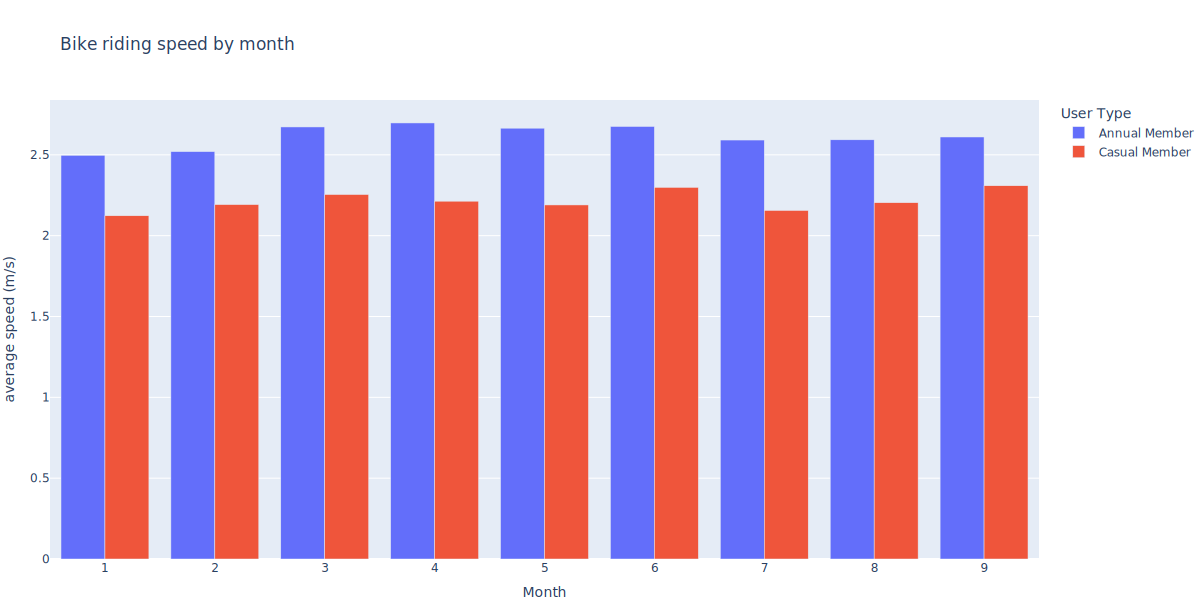

In [29]:
byMon_speed = df_v4[df_v4["avg_speed"] != 0].groupby([df_v4['Start Time'].dt.month, 'User Type'])["avg_speed"].mean()
byMon_speed = byMon_speed.reset_index()
fig = px.bar(byMon_speed, x='Start Time', y='avg_speed',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Month', 'avg_speed':'average speed (m/s)'}, 
             title='Bike riding speed by month', width=1200, height=600)

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

#### Speed of the bike on daily basis

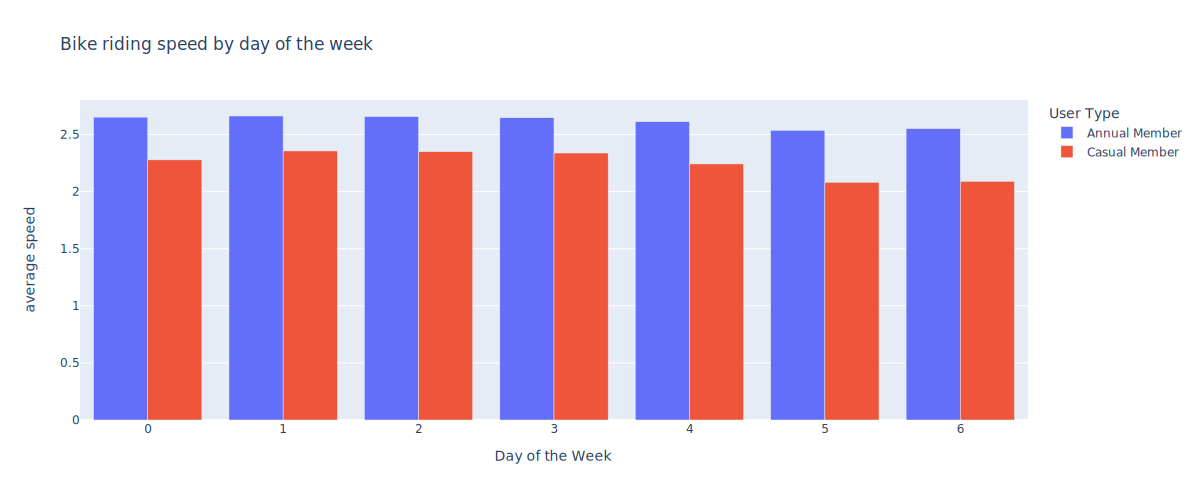

In [30]:
byWeek_speed = df_v4[df_v4["avg_speed"] != 0].groupby([df_v4['Start Time'].dt.weekday, 'User Type'])["avg_speed"].mean()
byWeek_speed = byWeek_speed.reset_index()
fig = px.bar(byWeek_speed, x='Start Time', y='avg_speed',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Day of the Week', 'avg_speed':'average speed'}, 
             title='Bike riding speed by day of the week', height=500, width=1200)
fig.show()

#### Speed of the bike on hourly basis

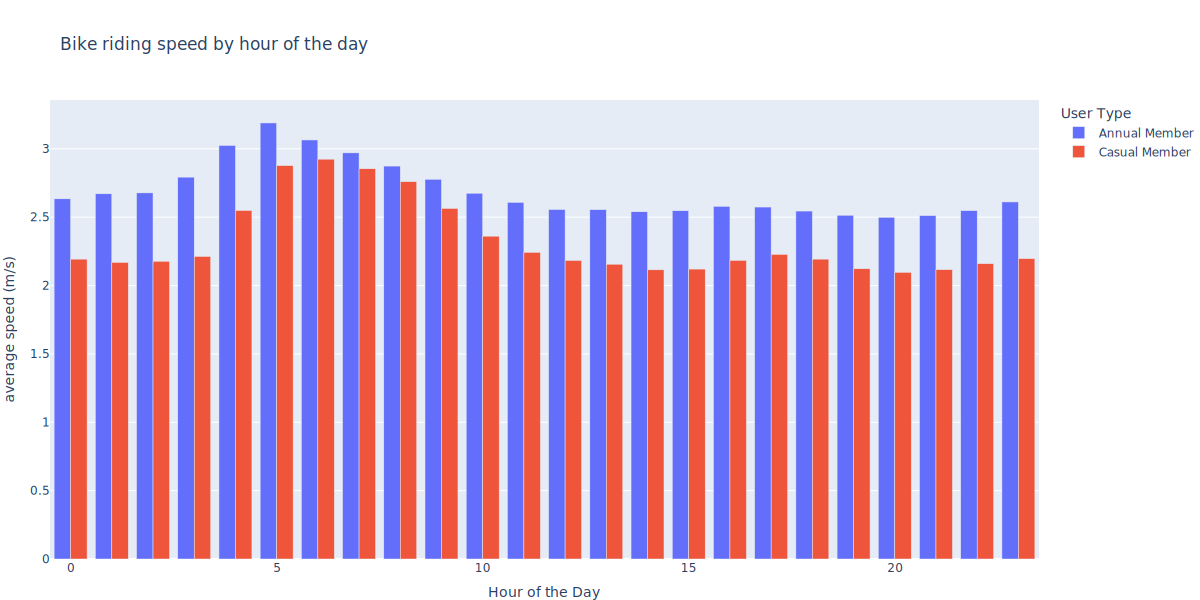

In [32]:
byHr_speed = df_v4[df_v4["avg_speed"] != 0].groupby([df_v4['Start Time'].dt.hour, 'User Type'])["avg_speed"].mean()
byHr_speed = byHr_speed.reset_index()
fig = px.bar(byHr_speed, x='Start Time', y='avg_speed',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Hour of the Day', 'avg_speed':'average speed (m/s)'}, 
             title='Bike riding speed by hour of the day', width=1200, height=600)

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

#### How the riders behaves in terms of Trip duration

#### Duration of trip on monthly basis

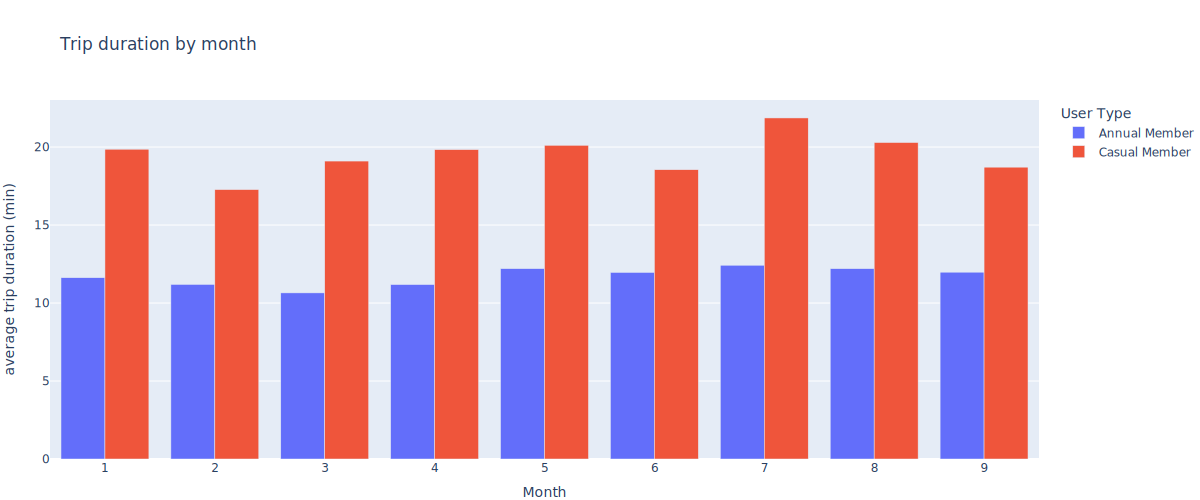

In [33]:
byMon_duration = df_v4.groupby([df_v4['Start Time'].dt.month, 'User Type'])['Trip  Duration'].mean()
byMon_duration = byMon_duration.reset_index()
byMon_duration['Trip  Duration'] = byMon_duration['Trip  Duration']/60
fig = px.bar(byMon_duration, x='Start Time', y='Trip  Duration',
             color='User Type', barmode = 'group', height = 500, width=1200,
             labels={'Start Time':'Month', 'Trip  Duration':'average trip duration (min)'}, 
             title='Trip duration by month')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

#### Duration of trip on weekly basis

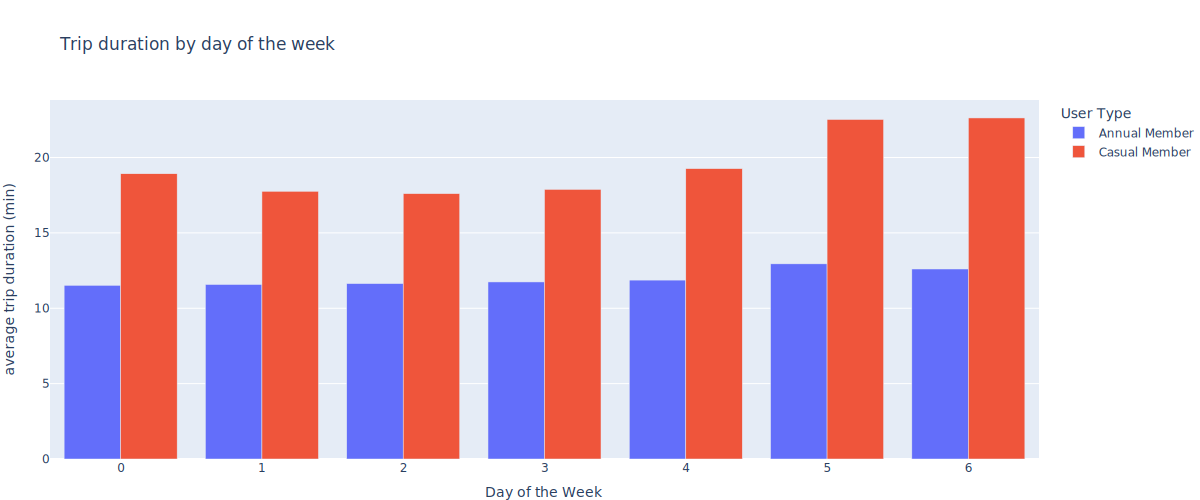

In [34]:
byWeek_duration = df_v4.groupby([df_v4['Start Time'].dt.weekday, 'User Type'])['Trip  Duration'].mean()
byWeek_duration = byWeek_duration.reset_index()
byWeek_duration['Trip  Duration'] = byWeek_duration['Trip  Duration']/60
fig = px.bar(byWeek_duration, x='Start Time', y='Trip  Duration',
             color='User Type', barmode = 'group', height = 500, width=1200,
             labels={'Start Time':'Day of the Week', 'Trip  Duration':'average trip duration (min)'}, 
             title='Trip duration by day of the week')
fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

#### Duration of trip on hourly basis

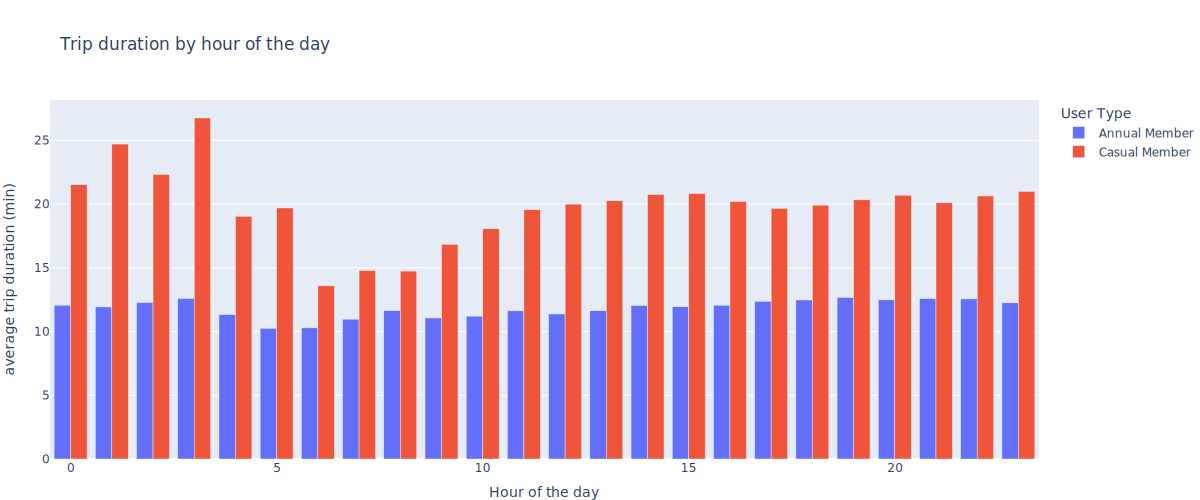

In [35]:
byHr_duration = df_v4.groupby([df_v4['Start Time'].dt.hour, 'User Type'])['Trip  Duration'].mean()
byHr_duration = byHr_duration.reset_index()
byHr_duration['Trip  Duration'] = byHr_duration['Trip  Duration']/60
fig = px.bar(byHr_duration, x='Start Time', y='Trip  Duration',
             color='User Type', barmode = 'group', height = 500, width=1200,
             labels={'Start Time':'Hour of the day', 'Trip  Duration':'average trip duration (min)'}, 
             title='Trip duration by hour of the day')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()

## Data Analysis 3:

#### Popular stations in 2022

In [36]:
#merging the name of the stations with the main dataframe

station = df_v4.groupby(df_v4['Start Station Id'])["Start Time"].count()
station = station.reset_index()
station = station.merge(bikeshare_stations, how='left', left_on='Start Station Id', right_on='station_id')
station = station.rename({"Start Time":"pick-up times"}, axis="columns")
station

,Start Station Id,pick-up times,station_id,name,lat,lon
0,7000,17125,7000,Fort York Blvd / Capreol Ct,43.6398,-79.3960
1,7001,11130,7001,Wellesley Station Green P,43.6650,-79.3836
2,7002,14751,7002,St. George St / Bloor St W,43.6673,-79.3994
3,7003,7292,7003,Madison Ave / Bloor St W,43.6672,-79.4028
4,7004,4827,7004,University Ave / Elm St,43.6565,-79.3891
...,...,...,...,...,...,...
616,7719,2209,7719,Wolseley St / Augusta Ave,43.6484,-79.4005
617,7720,3312,7720,King St W / Portland St,43.6444,-79.4007
618,7721,2368,7721,Widmer St / King St W,43.6464,-79.3912
619,7724,482,7724,Wellesley St E / Parliament St,43.6682,-79.3703


#### Popular pickup stations in 2022

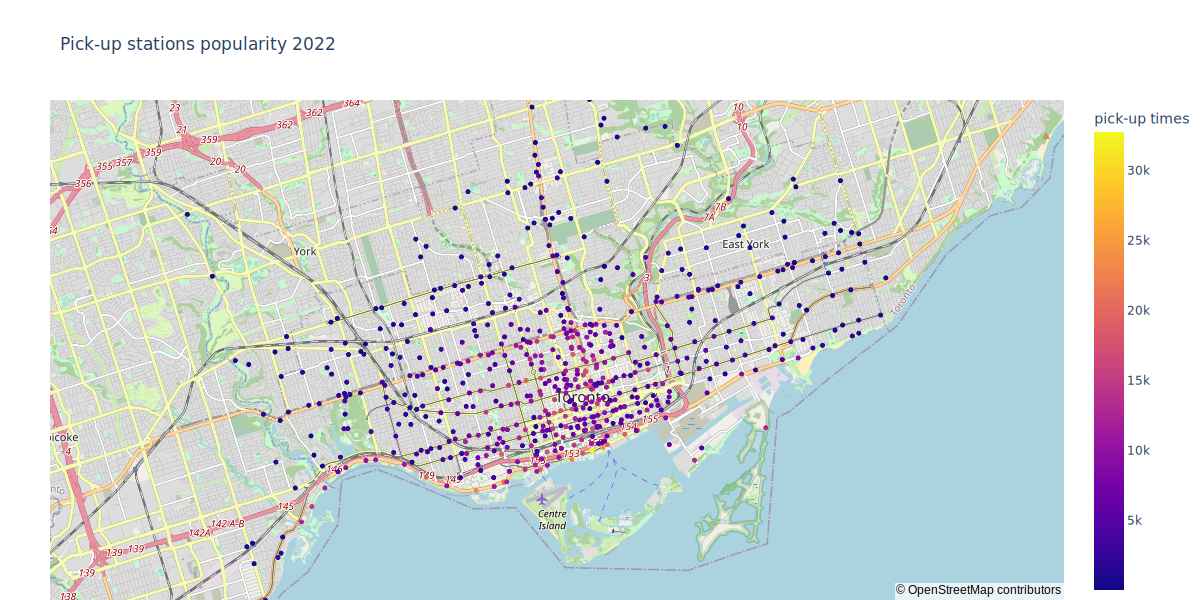

In [37]:
fig = px.scatter_mapbox(station, lat="lat", lon="lon", 
                        labels={'pick-up times':'pick-up times'},
                        hover_data={'lat':False, # remove from hover data
                                    'lon':False, # remove from hover data
                                    'name':True, # display
                                    'pick-up times':True # display 
                                    },
                        color="pick-up times", zoom=11,
                        title='Pick-up stations popularity 2022', width=1200, height=600)

fig.update_layout(mapbox_style="open-street-map", margin ={'l':50,'b':0,'r':0})
fig.show()

#### Popular pickup stations in 2022 according to month

In [38]:
#merging the pickup station to the dataframe
station_byMon = df_v4.groupby([df_v4['Start Station Id'], df_v4["Start Time"].dt.month])["Bike Id"].count()
station_byMon = station_byMon.reset_index()
station_byMon = station_byMon.merge(bikeshare_stations, how='left', left_on='Start Station Id', right_on='station_id')
station_byMon = station_byMon.rename({"Start Time":"month", "Bike Id":"pick-up times"}, axis = "columns")

- This below will not be visualized proplerly on Github you can download and change the renderer of plotly to default

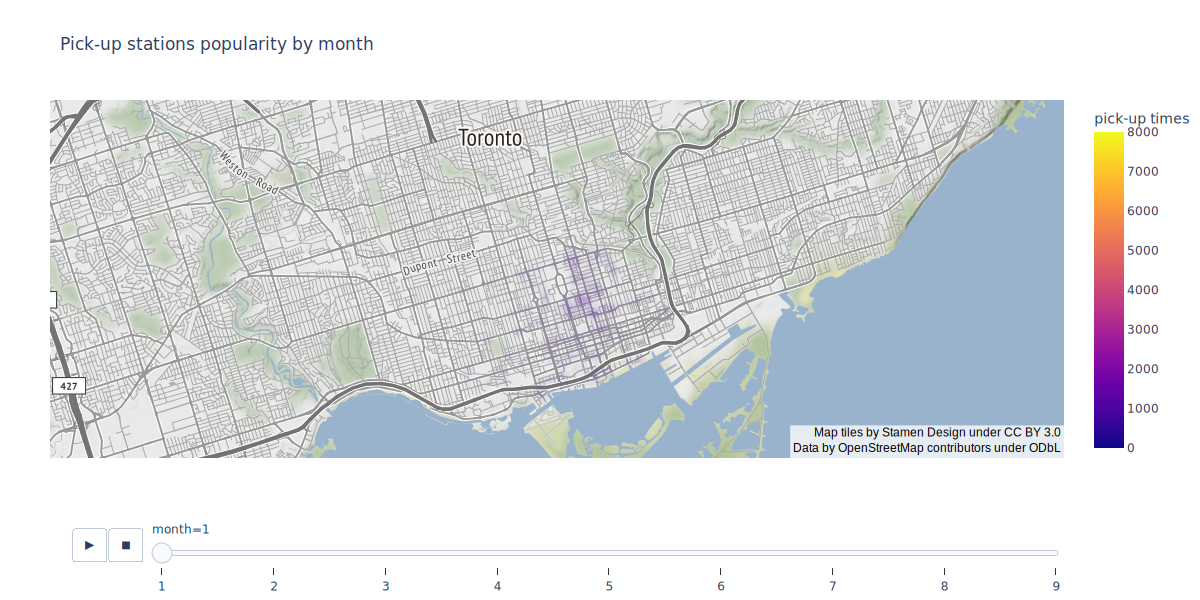

In [39]:
fig = px.density_mapbox(station_byMon, lat="lat", lon="lon", 
                        z="pick-up times", radius=10, zoom=11,
                        mapbox_style="stamen-terrain",
                        hover_data={'lat':False, 
                                    'lon':False, 
                                    'month':True,
                                    'name':True, 
                                    'pick-up times':True
                                    },
                        animation_frame="month",
                        range_color = [0,8000],
                        title='Pick-up stations popularity by month', width=1200, height=600)

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()